## Four algorithms in Qiskit Part 4

In [12]:
# Import libraries and necessary tools

from qiskit import *
import numpy as np
import math
from qiskit.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeJakarta, FakeNairobi

### Grover's Algorithm

In [13]:
""" Defining Diffuser (Z0) for N qubits"""

def diffuser(N):
    
    cir = QuantumCircuit(N)
    
    # Applying anti controlled Z gate
    
    cir.x(range(N))
    
    cir.h(0)
    cir.mcx([iz for iz in range(1,N)], 0)
    cir.h(0)
    
    cir.x(range(N))
    
    return cir

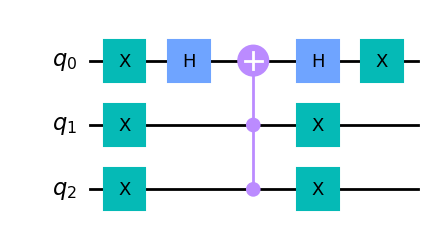

In [14]:
# Checking the diffuser function for 3 qubits

q2 = diffuser(3)
q2.draw('mpl')

In [15]:
""" Defining the oracle(Zf) for N qubits and inp: input string such that f(inp) = 1"""

def oracle(N, inp):
    
    cir = QuantumCircuit(N)
    
    # Checking the positions of '0' in the input string and applying X gate for the application of 
    # anti-controlled Z gate
    
    for iz in range(N):
        if inp[iz]=='0':
            cir.x(N-iz-1)
    
    # Multiple controlled Z gate
    cir.h(0)
    cir.mcx([iz for iz in range(1,N)], 0)
    cir.h(0)
    
    # Applying X gates to reverse the effect of above applied X gates
    for iz in range(len(inp)):
        if inp[iz]=='0':
            cir.x(N-iz-1)
            
    return cir

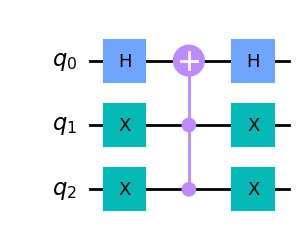

In [16]:
# Checking the oracle function for 3 qubits and input string '001'

q2 = oracle(3, '001')
q2.draw('mpl')

In [17]:
""" Defining Grover's Algorithm """

def grovers_algo_gen(N, oracle_1):
    
    # calculating number of iterations for the Grover's operator
    
    m = int(np.round(np.pi*np.sqrt(2**N)/4 - 0.5))
    
    # Creating a quantum circuit of 'N' qubits 

    qc = QuantumCircuit(N, N)

    # Applying Hadamard gates to all qubits to create superposition

    qc.h(range(N))
    qc.barrier()      # Barrier for better visualization
    
    # Iterating the Grover's operator 'm' times
    
    for iz in range(m):
        
        # Appending the oracle
        
        qc.append(oracle_1, range(N))
        qc.barrier()                  # Barrier for better visualization

        # Applying Hadamard gates on all qubits 

        qc.h(range(N))
        qc.barrier()                 # Barrier for better visualization

        # Appending the diffuser to the quantum circuit

        qc.append(diffuser(N), range(N))
        qc.barrier()                 # Barrier for better visualization

        # Applying Hadamard gates to all qubits 

        qc.h(range(N))
        qc.barrier()                 # Barrier for better visualization

    # Measuring all N qubits to find the desired output

    qc.measure(range(N), range(N))

    return qc

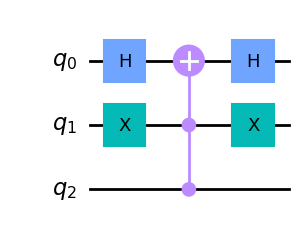

In [18]:
# Testing the algorithm for N=3 and f('101') = 1

N = 3
ora = oracle(N, '101')
ora.draw('mpl')

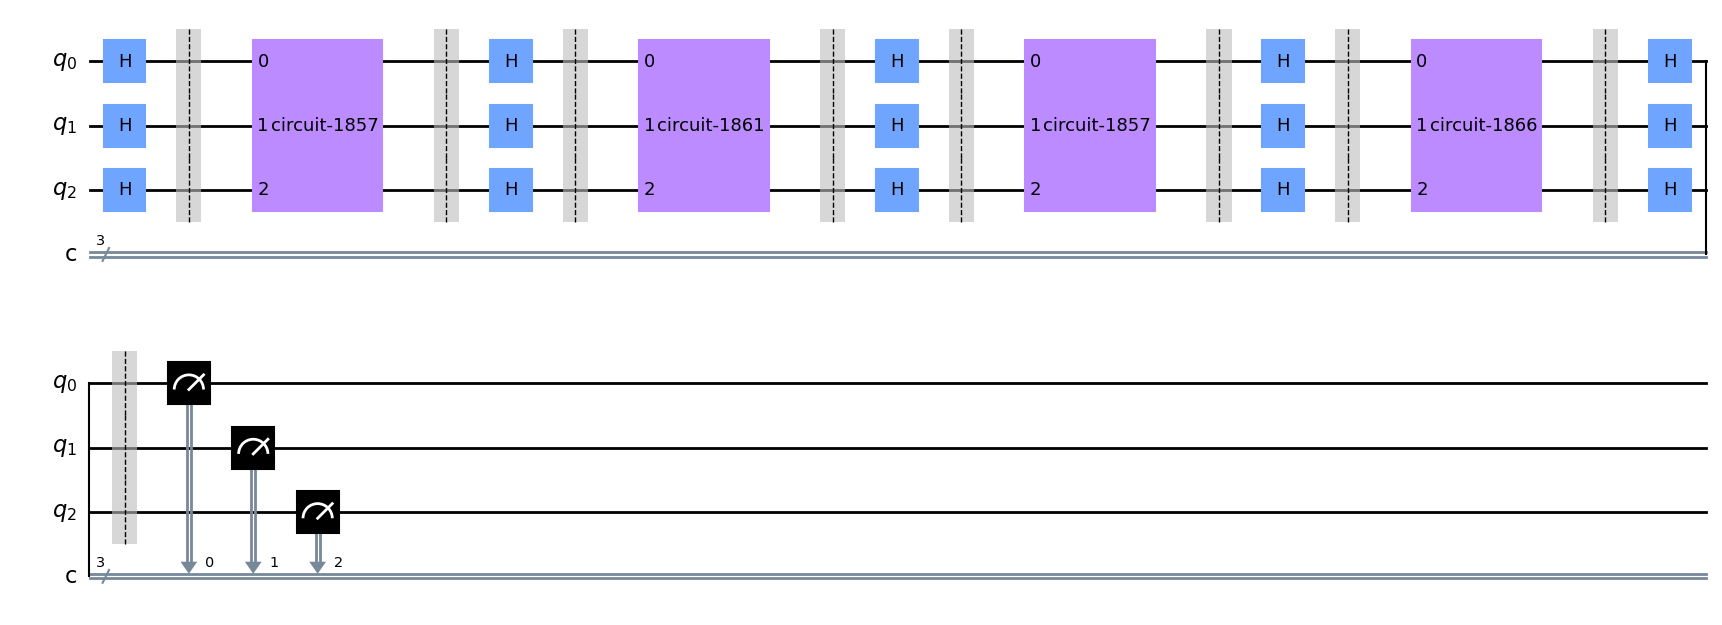

In [19]:
q1 = grovers_algo_gen(N, ora)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


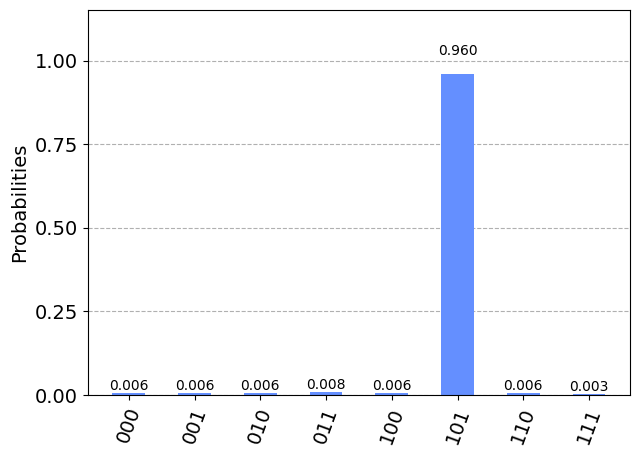

In [20]:
# Running on non-noisy simulator 1

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


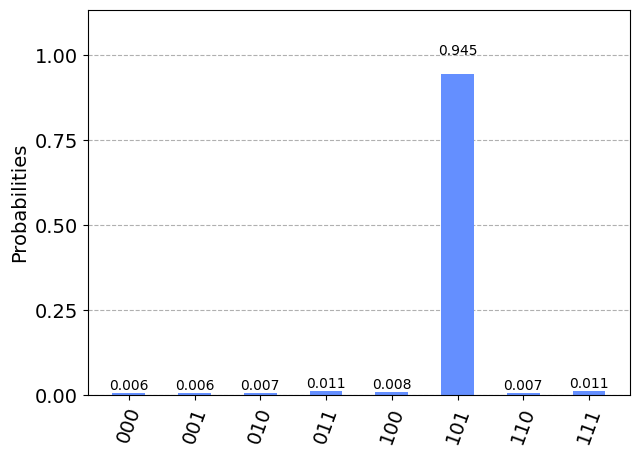

In [21]:
# Running on non-noisy simulator 2

backend = Aer.get_backend('qasm_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

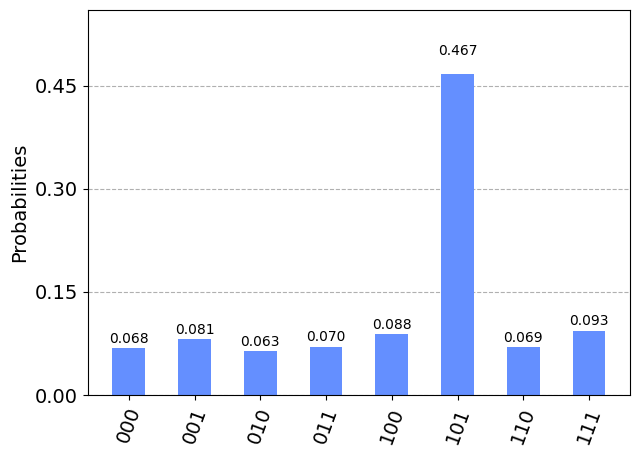

In [22]:
# Running on noisy simulator 1

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

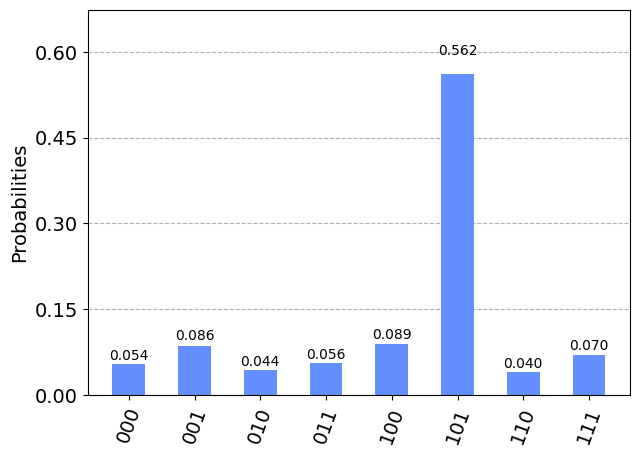

In [23]:
# Running on noisy simulator 1

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [24]:
# Defining a function that gives the output directly without running many cells

# inp_str - the input string corresponding to f(x) = 1
# sim: simulator on which you want to run the algorithm
#.    - 1: non-noisy aer simulator
#       2: non-noisy qasm simulator
#       3: noisy simulator FakeJakarta
#       4: noisy simulator FakeBelem
# Output: counts, maximum number of counts are obtained for the secret string

def run(inp_str, sim):
    
    N = len(inp_str)
    oracle_1  = oracle(N, inp_str)

    q1 = grovers_algo_gen(N, oracle_1)
    
    count = 0
    
    if sim==1:
        
        backend = Aer.get_backend('aer_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    elif sim == 2:
        
        backend = Aer.get_backend('qasm_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    elif sim == 3:
        
        backend = FakeJakarta()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    else:
        
        backend = FakeNairobi()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    return counts

In [25]:
# Testing the algorithm for '10' on all 4 simulators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


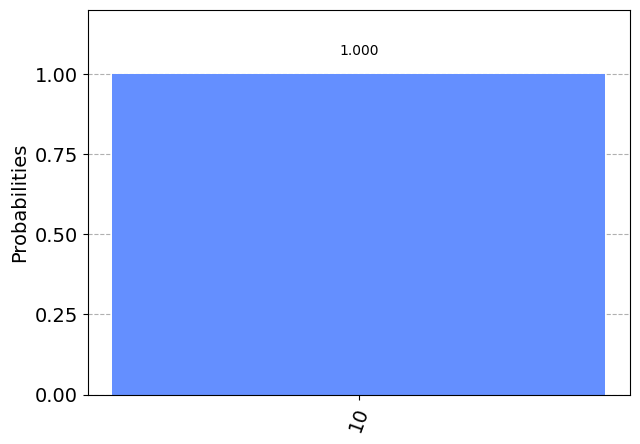

In [26]:
plot_histogram(run('10', 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


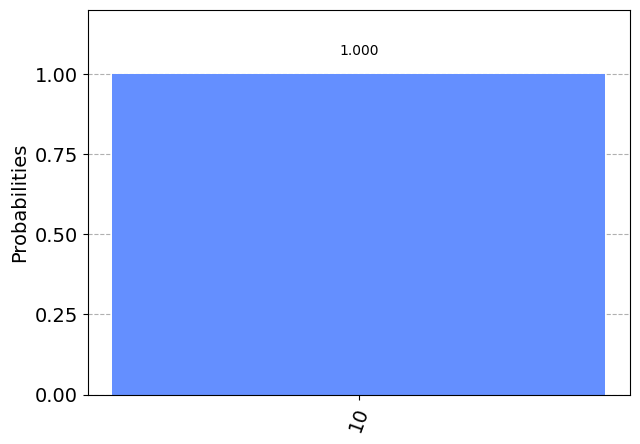

In [27]:
plot_histogram(run('10', 2))

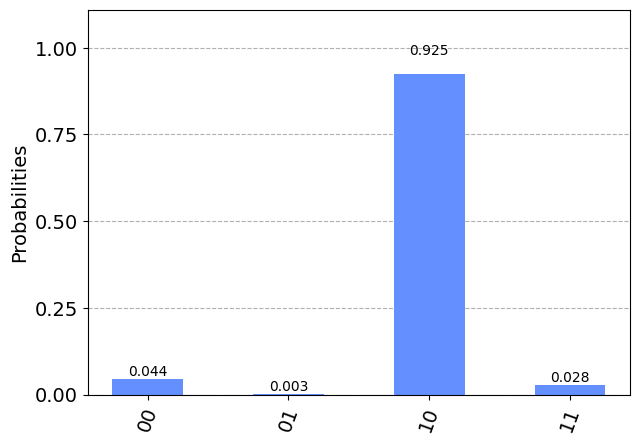

In [28]:
plot_histogram(run('10', 3))

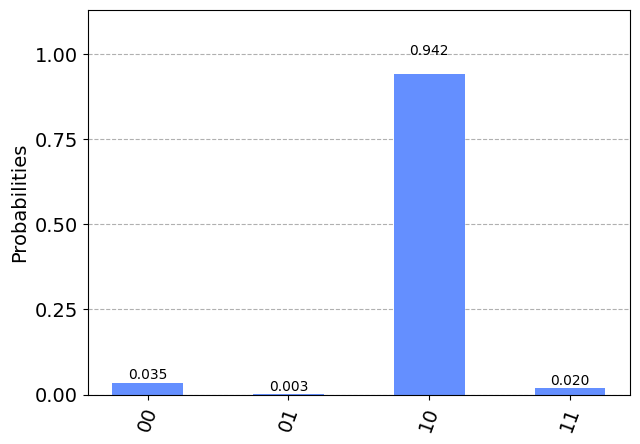

In [29]:
plot_histogram(run('10', 4))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


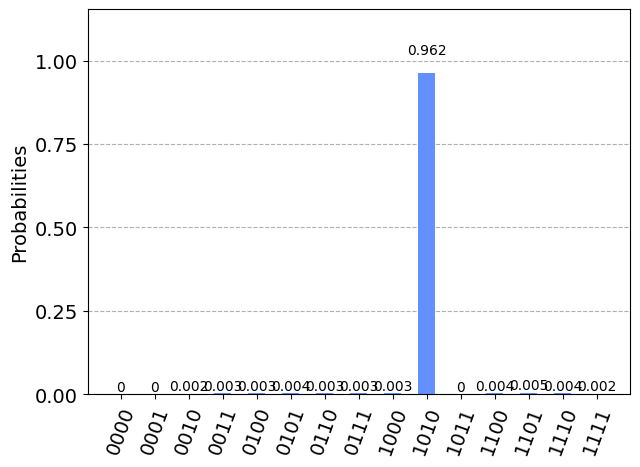

In [30]:
# Testing the algorithm for '1010' on all 4 simulators

plot_histogram(run('1010', 1))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


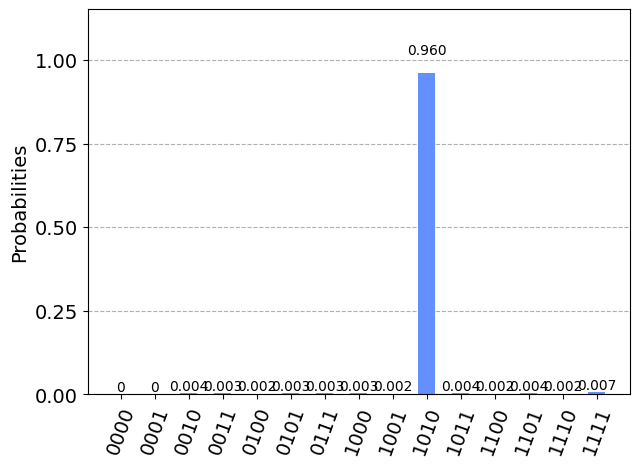

In [31]:
plot_histogram(run('1010', 2))

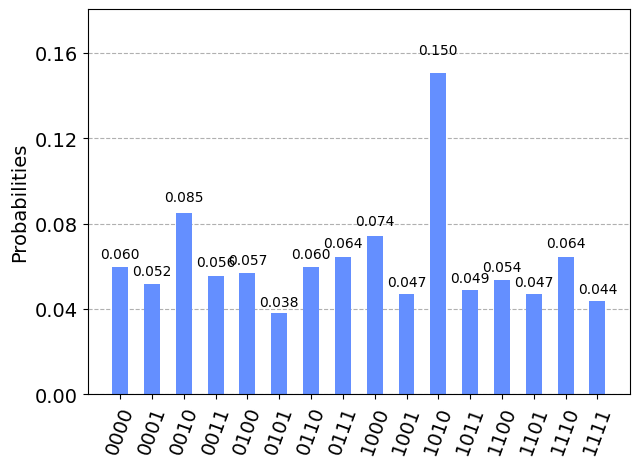

In [32]:
plot_histogram(run('1010', 3))

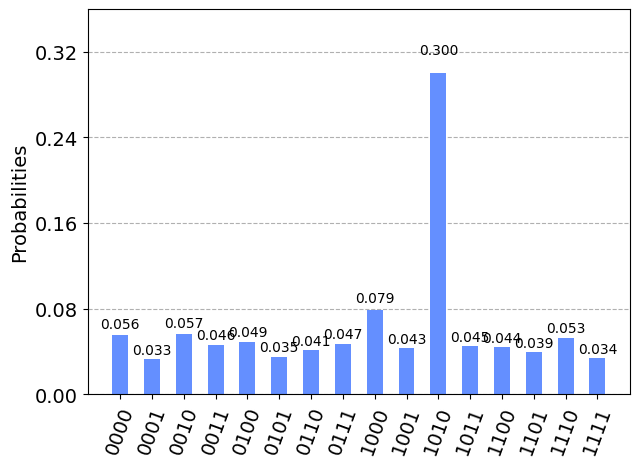

In [33]:
plot_histogram(run('1010', 4))

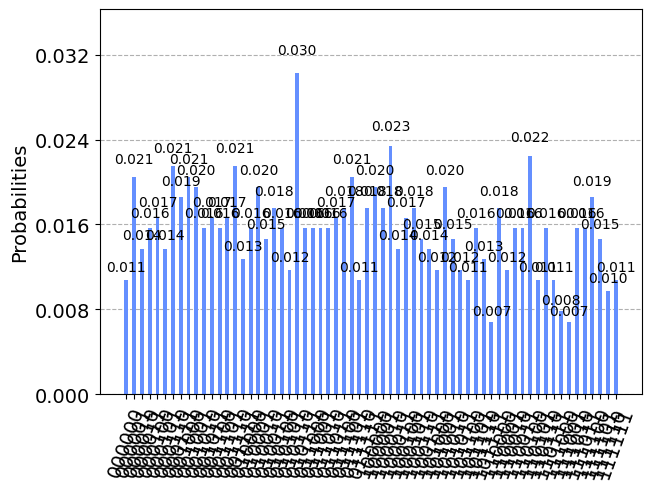

In [36]:
# Testing the algorithm for a string of 6 bits on noisy simulator

plot_histogram(run('101011', 4))